In [23]:
import pandas as pd
import numpy as np
import statistics as stat
import random as rand 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
customer_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
customer_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
numericals = customer_df.select_dtypes(include=[np.number])
categoricals = customer_df.select_dtypes(exclude=[np.number])
# or categoricals = customer_df.select_dtypes(include=[np.object])

#numeric_data.shape[1]
#categorical_data.shape[1] 
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
correlation = numericals.corr()
correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


<AxesSubplot:>

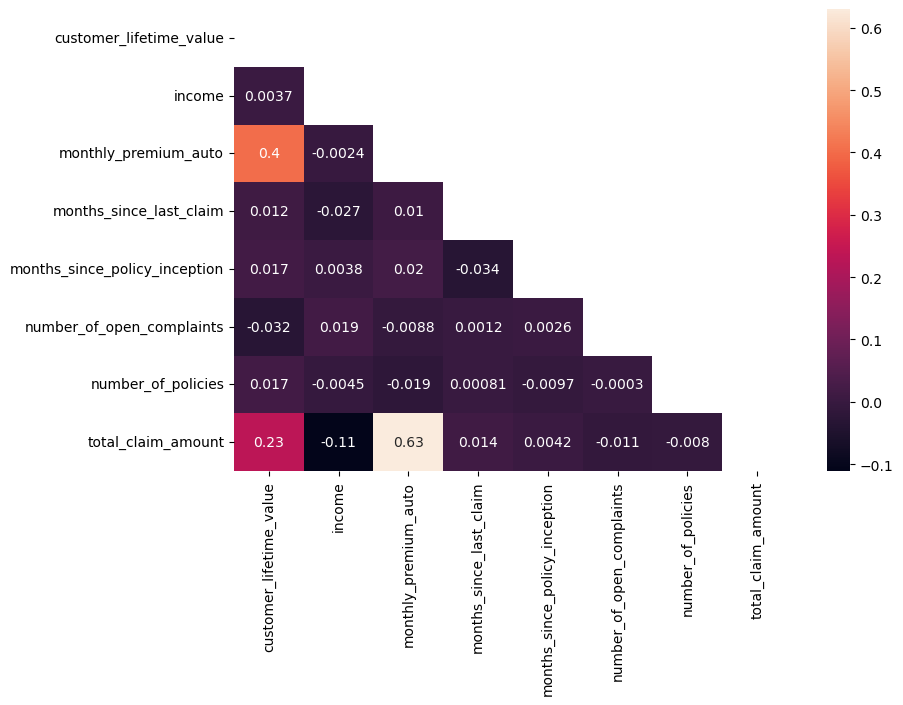

In [8]:
fig=plt.figure(figsize=(9,6))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,annot=True, mask=mask)

In [9]:
customer_df.drop(columns=['monthly_premium_auto'], inplace=True)
customer_df   #I wouldnt say they are highly correlated but dropped anyway.

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [10]:
#One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).


categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [16]:
pd.get_dummies(categoricals , drop_first = True)

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

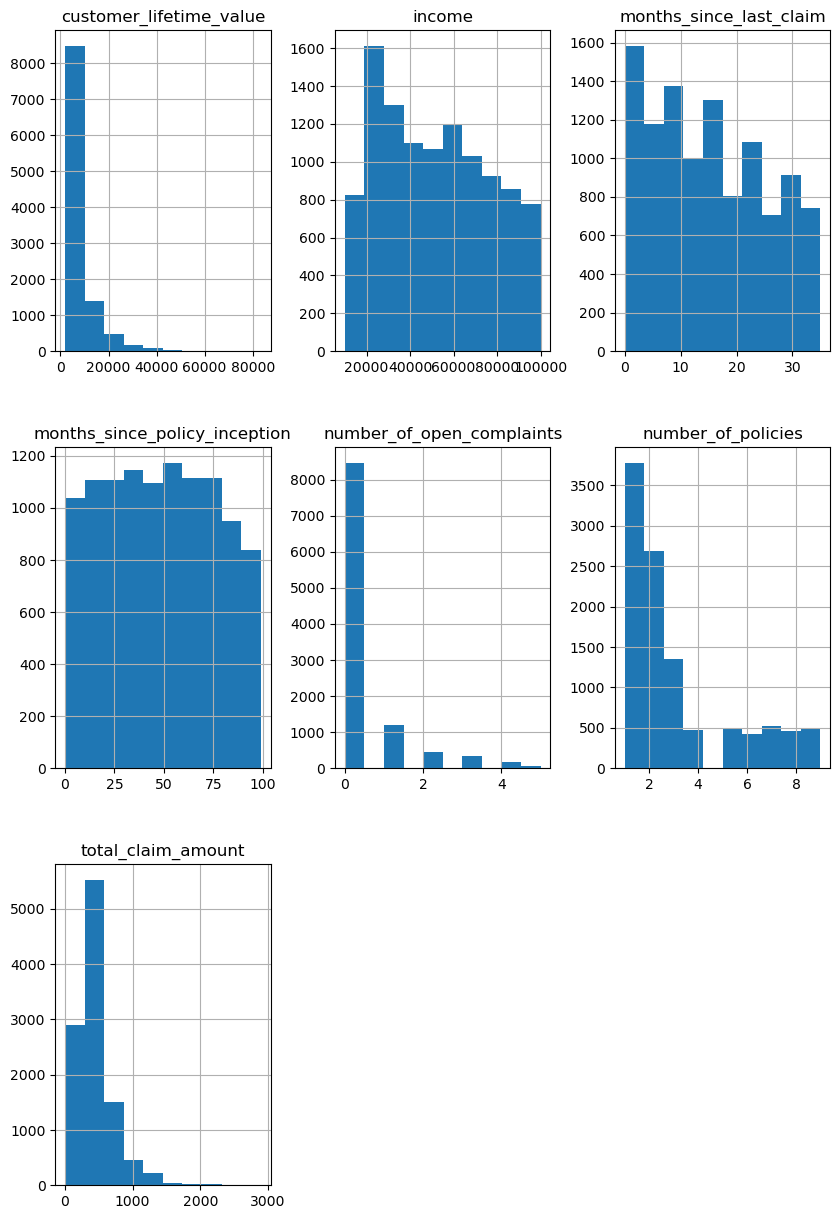

In [17]:
#Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

#varA
#Check that varA has been rescaled using a distplot or a histogram
#varB
#Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
#Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.


customer_df.hist(figsize=(10,15))

In [39]:
# One hot encoder
#categoricals = pd.get_dummies(categoricals, columns = ['response', 'gender','month'], drop_first=True)
#categoricals


#to make with label encoding, I will change the columns manually for each column 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
categoricals['region']= label_encoder.fit_transform(categoricals['region'])





In [25]:
sum_clv = sum(customer_df.customer_lifetime_value)
sum_clv

85639271

In [55]:
from sklearn.preprocessing import minmax_scale
import pandas as pd

# extract column_to_scale as a Pandas series
income = customer_df['income']

scaler = MinMaxScaler()

scaled_column = scaler.fit_transform(income.values.reshape(-1, 1))

# add the scaled column back to the original dataset
customer_df['scaled_column'] = scaled_column
scaled_column

# save the scaled data to a new csv file
#data.to_csv('scaled_dataset.csv', index=False)


array([[0.42239616],
       [0.9141577 ],
       [0.13455039],
       ...,
       [0.33131726],
       [0.60213021],
       [0.6549075 ]])

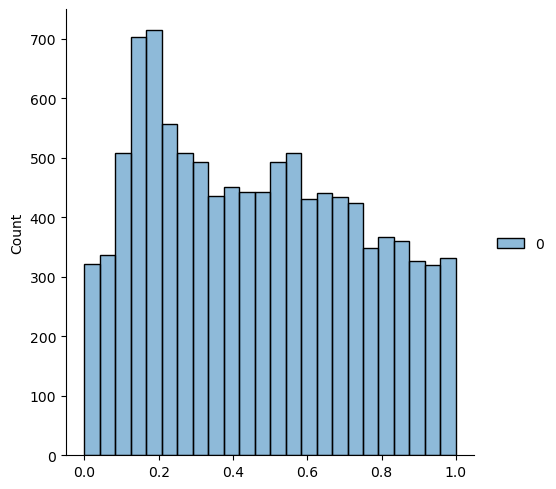

In [48]:
sns.displot(scaled_column)

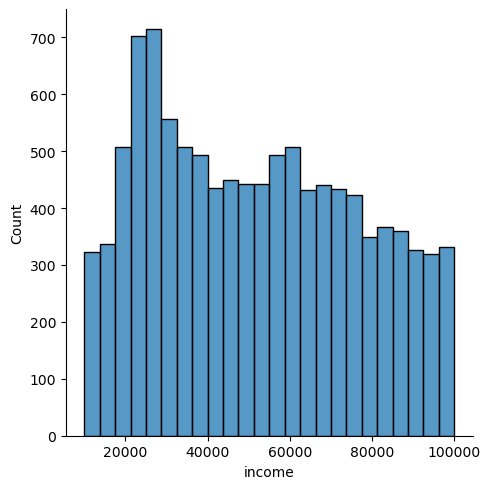

In [49]:
sns.displot(income) #previous version

sns.displot(income)  #the previous version

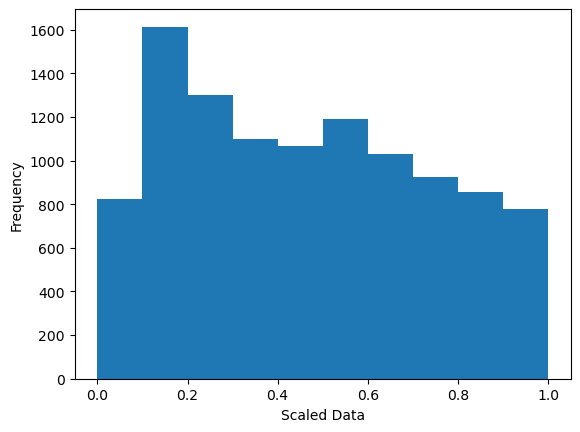

In [50]:
plt.hist(scaled_column, bins=10)
plt.xlabel('Scaled Data')
plt.ylabel('Frequency')
plt.show()

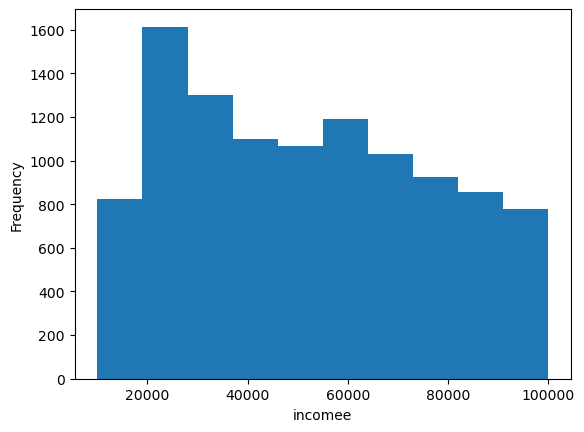

In [51]:
plt.hist(income, bins=10)
plt.xlabel('incomee')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#varB
#Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
#Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [56]:
#yeo-johnson
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans_yeo = power.fit_transform(customer_lifetime_value.values.reshape(-1,1))
data_trans_yeo

array([[-0.33614341],
       [-1.86720472],
       [ 1.2922699 ],
       ...,
       [ 1.79973101],
       [ 1.0217405 ],
       [ 0.24359374]])

In [60]:
np.mean(data_trans_yeo)

4.18787467049175e-15

In [62]:
np.std(data_trans_yeo)

1.0000000000000002

In [57]:
#box-cox

from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox', standardize=True)
data_trans_box = power.fit_transform(customer_lifetime_value.values.reshape(-1,1))
data_trans_box

array([[-0.3361235 ],
       [-1.8672622 ],
       [ 1.29224877],
       ...,
       [ 1.79972704],
       [ 1.02172022],
       [ 0.24359579]])

In [61]:
np.mean(data_trans_box)

-3.792353173834196e-15

In [63]:
np.std(data_trans_box)

1.0